## Building with Google Gemini API
This workbook has code that shows you how you can integrate with the Google Gemini API.

Before proceeding setup your environment - for instructions see README.md file.

In [1]:
import os
from dotenv import load_dotenv, find_dotenv

# load the API keys from local .env file
_ = load_dotenv(find_dotenv())  # read local .env file

In [2]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [3]:
llm = ChatGoogleGenerativeAI(
    model="gemini-pro",
    google_api_key=os.environ["GOOGLE_API_KEY"],
    temperature=0.6,
    convert_system_message_to_human=True,
)

In [4]:
# result = llm.invoke("Write a ballad about LangChain")
result = llm.invoke("Here is a fun fact about Pluto:")
print(result.content)

Pluto was reclassified from a planet to a dwarf planet by the International Astronomical Union (IAU) in 2006.


In [29]:
# NOTE: Google Gemini does not support generate()
# result = llm.generate(
#     ["Here is a fun fact about Pluto", "Here is a fun fact about the Sun"]
# )
# print(result)

Google Gemini does not support System Messages. To circumvent this, set the `convert_system_message_to_human` parameter of LLM constructor to `True`

In [5]:
from langchain_core.messages import HumanMessage, SystemMessage

model = ChatGoogleGenerativeAI(
    model="gemini-pro",
    convert_system_message_to_human=True,
    temperature=0.6,
    verbose=True,
)
response = model(
    [
        SystemMessage(content="Answer only yes or no."),
        HumanMessage(content="Is Sydney the capital of Australia?"),
    ]
)
print(response.content)

/home/mjbhobe/code/git-projects/GenAiWithGemini/myenv/lib/python3.11/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.7 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


No


In [6]:
# ChatGoogleGenerativeAI natively supports streaming and batching. Below is an example.
for chunk in llm.stream("Write a limmerick about LLMs"):
    print(chunk.content)
    print("-" * 20)

There once was a model named LL,
Whose language flowed smooth as a shell
--------------------
.
With vast knowledge and grace,
It could write with great pace,
Creating tales that all could dwell.
--------------------


In [7]:
print(llm.invoke("What is sin(45)").content)

√2/2


## Working with images
Gemini is multi-modal, meaning that it supports text and images at the same time.

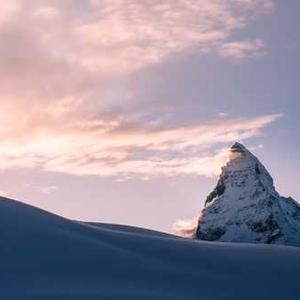

In [8]:
import requests
from IPython.display import Image

image_url = "https://picsum.photos/seed/picsum/300/300"
content = requests.get(image_url).content
Image(content)

In [9]:
# now let's ask Gemini to describe the image
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    # NOTE: to use images, change the model from gemini-pro to gemini-pro-vision
    model="gemini-pro-vision",
    convert_system_message_to_human=True,
    temperature=0.6,
    verbose=True,
)
# example
sys_message = SystemMessage(
    content="""You are creating marketing content for a tour operator that 
        arranges tours and trecks to exotic locations. Your message should appeal to 
        the casual non treckers as well as avid treckers. 
        Be as descriptive as possible and provide separate content for both categories"""
)
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "What's in this image?",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image_url},
    ]
)
response = llm.invoke([sys_message, message])
print(response.content)

 This is a picture of the Matterhorn, a mountain in the Alps. It is one of the most popular mountains in the world to climb, and it is also a popular destination for trekkers. The Matterhorn is a challenging climb, but it is also very rewarding. The views from the summit are breathtaking, and the experience of climbing the mountain is one that you will never forget.

If you are a casual non trekker, you may be wondering if you are capable of climbing the Matterhorn. The answer is yes! The Matterhorn is a challenging climb, but it is not impossible. With the proper training and preparation, you can reach the summit of the Matterhorn.

If you are an avid trekker, you are probably already familiar with the Matterhorn. You may be wondering if the Matterhorn is a challenge for you. The answer is yes! The Matterhorn is a challenging climb, even for experienced trekkers. However, if you are up for the challenge, the Matterhorn is an unforgettable experience.

No matter what your level of expe

In [10]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

In [11]:
tweet_prompt = PromptTemplate.from_template(
    """You are a content creator. Write me a funny tweet about {topic}"""
)

In [14]:
tweet_chain = LLMChain(llm=model, prompt=tweet_prompt, verbose=True)

In [15]:
topic = "Generative AI"
resp = tweet_chain.run(topic=topic)
print(resp)



> Entering new LLMChain chain...
Prompt after formatting:
You are a content creator. Write me a funny tweet about Generative AI

> Finished chain.
I just asked Generative AI to write a joke, and it said, "Why did the AI cross the road? To generate to the other side!" 😂
